In [ ]:
'''
Example 

z = 10x + 9y 
subject to
(7/10)*x + y <= 630
(1/2)*x + (5/6)*y <= 600
x + (2/3)*y <= 708
(1/10)*x + (1/4)*y <= 135

'''

Status: 1
Optimal values:
x = 540.0
y = 252.0
Optimal objective value: 7668.0


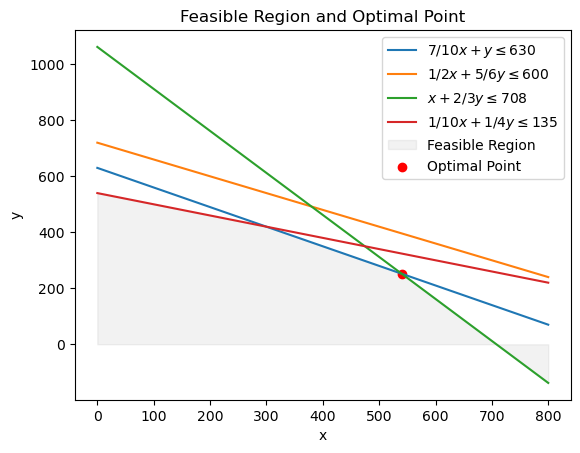

In [57]:
from pulp import *
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create a linear programming problem
prob = LpProblem("MyLPProblem", LpMaximize)

# Step 3: Define decision variables
x = LpVariable("x", lowBound=0)
y = LpVariable("y", lowBound=0)

# Step 4: Add the objective function and constraints
prob += 10*x + 9*y  # Objective function
prob += (7/10)*x + y <= 630
prob += (1/2)*x + (5/6)*y <= 600
prob += x + (2/3)*y <= 708
prob += (1/10)*x + (1/4)*y <= 135

# Step 5: Solve the problem
prob.solve()

# Display the results
print("Status:", prob.status)
print("Optimal values:")
print("x =", value(x))
print("y =", value(y))

# Get the optimal objective value
optimal_value = value(prob.objective)
print("Optimal objective value:", optimal_value)

# Plotting the feasible region
x_values = np.linspace(0, 800, 100)
y1_values = (630 - 7/10 * x_values)
y2_values = (600 - 1/2 * x_values) * 6/5
y3_values = (708 - x_values) * 3/2
y4_values = (135 - 1/10 * x_values) * 4

plt.plot(x_values, y1_values, label=r'$7/10x + y \leq 630$')
plt.plot(x_values, y2_values, label=r'$1/2x + 5/6y \leq 600$')
plt.plot(x_values, y3_values, label=r'$x + 2/3y \leq 708$')
plt.plot(x_values, y4_values, label=r'$1/10x + 1/4y \leq 135$')

plt.fill_between(x_values, np.minimum.reduce([y1_values, y2_values, y3_values, y4_values]), 0, alpha=0.1, color='gray', label='Feasible Region')

# Highlight the optimal point
plt.scatter(value(x), value(y), color='red', label='Optimal Point')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region and Optimal Point')
plt.legend()
plt.show()